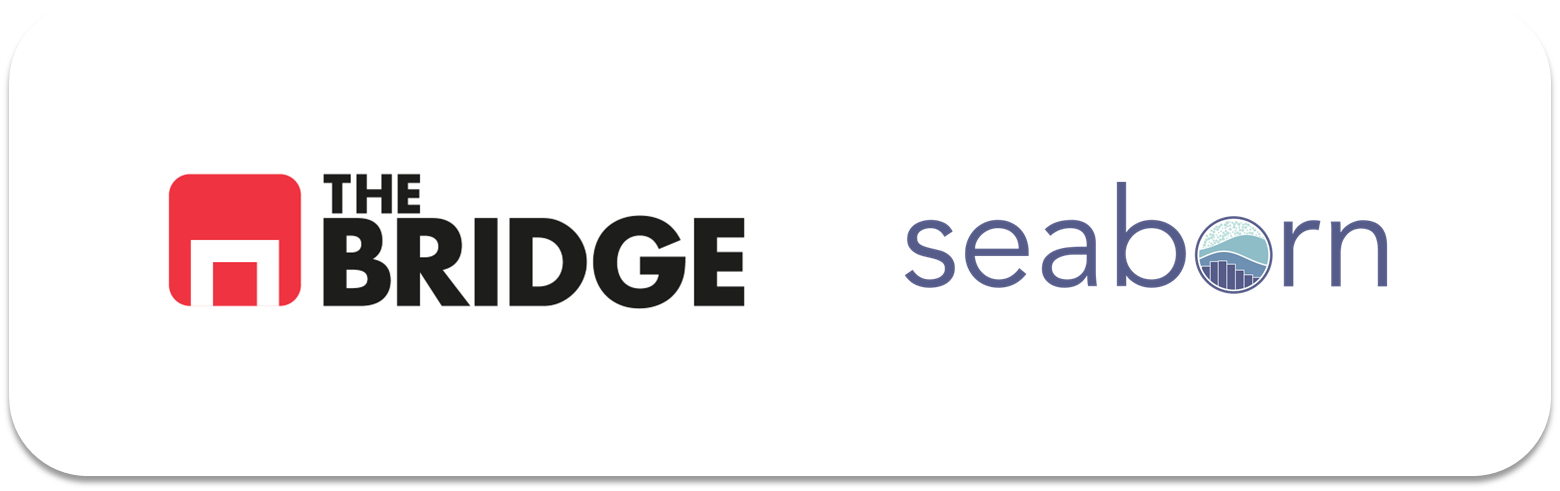

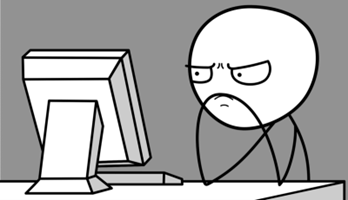

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de una sola variable, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Bitcoin, "./data/BTC.csv"
3. Viajes, "./data/dataset_viajes_jun23"

En el dataset de Bitcoin, convierte la columna "date" a datetime y luego hazla el índice del dataframe.

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_bitcoin = pd.read_csv("./data/BTC.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

In [3]:
df_bitcoin['date'] = pd.to_datetime(df_bitcoin['date']) 
df_bitcoin.set_index('date', inplace = True)

In [4]:
df_bitcoin.sample()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2017-02-04,1486166400,BTC/USD,1015.06,1044.23,1004.0,1034.44,5857358.53,5725.94


### Ejercicio 2

Crea una función que reciba un dataframe y una lista de columnas categóricas. La función debe generar una matriz de gráficas con 2 columnas y tantas filas como sean necesarias, en la que cada subplot muestre un diagrama de barras con las frecuencias absolutas de cada columna indicada. No es necesario verificar si las columnas son realmente categóricas. Cada gráfica deberá llevar como título: "Frecuencias Absolutas de "nombre de la columna"". Utiliza Seaborn para dibujar los diagramas de barras y matplotlib únicamente para el resto de elementos que necesites, excepto para la propia creación de las gráficas.

In [5]:
def dibujar_frecuencias_abs(df: pd.DataFrame, lista_cols: list):

    # Número total de columnas a graficar
    tam_lis = len(lista_cols)

    # Cálculo del número de filas: 2 gráficas por fila
    numFilas = (tam_lis + 1) // 2

    # Crear la figura y la matriz de ejes
    fig, axs = plt.subplots(nrows=numFilas, ncols=2, figsize=(12, 4 * numFilas))

    # Asegurarnos de que axs siempre se comporte como matriz 2D
    axs = axs.reshape(numFilas, 2)

    # Recorrer todas las columnas indicadas
    for i in range(tam_lis):
        fila = i // 2   # fila correspondiente dentro de la matriz de subplots
        col = i % 2     # columna correspondiente (0 o 1)

        # Obtener las frecuencias absolutas de la columna
        valores = df[lista_cols[i]].value_counts()

        # Dibujar el gráfico de barras con Seaborn
        sns.barplot(
            x=valores.index,     # categorías
            y=valores.values,    # frecuencias absolutas
            ax=axs[fila, col]    # subplot correspondiente
        )

        # Añadir el título solicitado
        axs[fila, col].set_title(f'Frecuencias Absolutas de {lista_cols[i]}')

        # Limpiar etiquetas innecesarias
        axs[fila, col].set_xlabel("")
        axs[fila, col].set_ylabel("Frecuencia")

    # Si queda un hueco (cuando hay un número impar de columnas), se desactiva el eje vacío
    if tam_lis % 2 == 1:
        axs[numFilas - 1, 1].axis("off")

    # Ajustar diseño y mostrar figura
    plt.tight_layout()
    plt.show()


### Ejercicio 3

Utiliza la función anterior para pintar las gráficas de frecuencias de las variables categóricas `alive,embark_town,who` del dataset de titanic


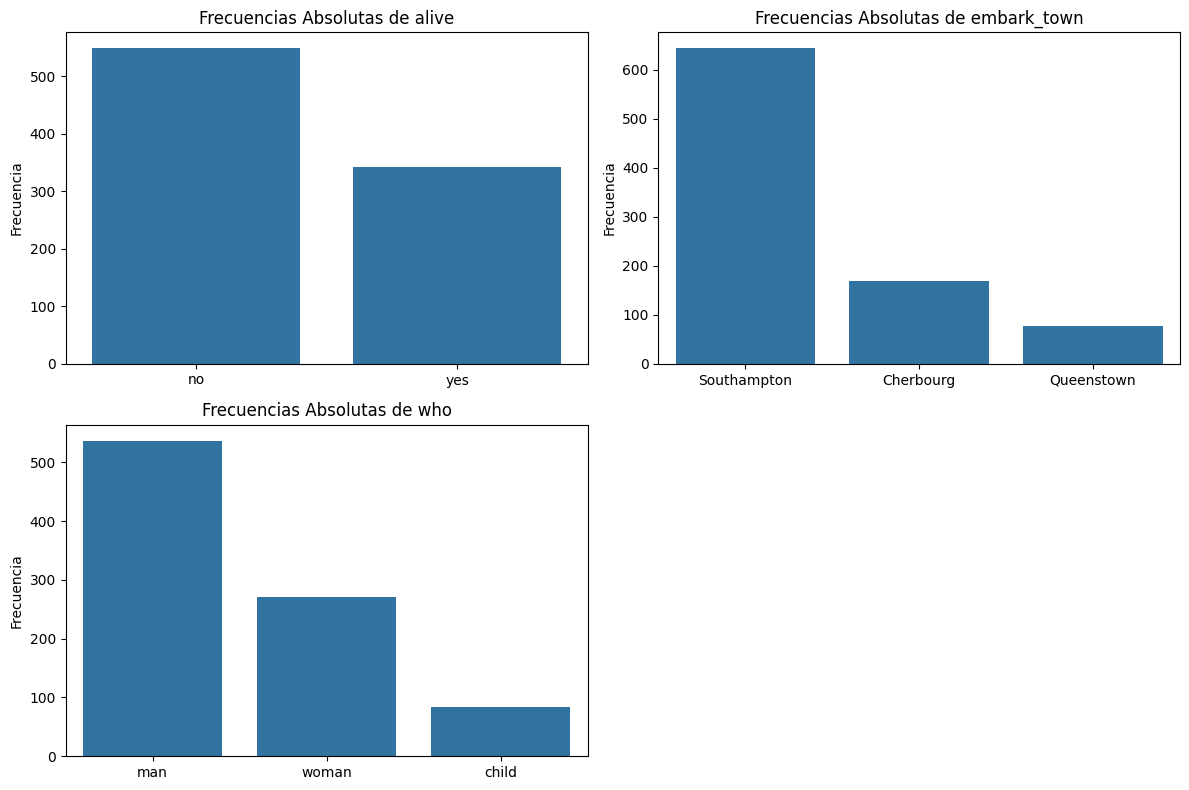

In [6]:
dibujar_frecuencias_abs(df_titanic, ["alive", "embark_town", "who"])

### Ejercicio 4

Crea una función similar a la del ejercicio 2, pero que esta vez pinte el histograma de una lista de columnas numéricas. Añade un argumento para poder indicar el número de bins. Añade, también, un argumento que permita incluir la función de densidad o no en la figura. De nuevo usa Seaborn para crear las figuras. También debe cumplirse el que pinte cada grafica en una matriz de 2 columnas como mucho y todas las filas que necesites.

In [15]:
def dibujar_histograma(df: pd.DataFrame, lista_cols: list, bins : int, densidad : bool):
    # Número total de columnas a graficar
    tam_lis = len(lista_cols)

    # Cálculo del número de filas: 2 gráficas por fila
    numFilas = (tam_lis + 1) // 2

    # Crear la figura y la matriz de ejes
    fig, axs = plt.subplots(nrows=numFilas, ncols=2, figsize=(12, 4 * numFilas))
    fig.suptitle(f"Histogramas (bins={bins} y densidad = {densidad})")
    # Asegurarnos de que axs siempre se comporte como matriz 2D
    axs = axs.reshape(numFilas, 2)

    # Recorrer todas las columnas indicadas
    for i in range(tam_lis):
        fila = i // 2   # fila correspondiente dentro de la matriz de subplots
        col = i % 2     # columna correspondiente (0 o 1)

        # Obtener los valores de la columna
        valores = df[lista_cols[i]]/1000

        # Dibujar el gráfico con Seaborn
        sns.histplot(
            x=valores, 
            kde = densidad,
            bins = bins,
            color = "grey",    
            ax=axs[fila, col]    # subplot correspondiente
        )

        # Añadir el título solicitado
        axs[fila, col].set_title(f'Histograma de {lista_cols[i]}')

        # Limpiar etiquetas innecesarias
        axs[fila, col].set_xlabel("")
        axs[fila, col].set_ylabel(f"{lista_cols[i]}")

    # Si queda un hueco (cuando hay un número impar de columnas), se desactiva el eje vacío
    if tam_lis % 2 == 1:
        axs[numFilas - 1, 1].axis("off")

    # Ajustar diseño y mostrar figura
    plt.tight_layout()
    plt.show()



### Ejercicio 5

Aplica la función del ejercicio anterior para pintar los histogramas de las columnas "ingresos", "consumo_kg" y "duracion" del dataset de viajes pero aplicando la siguiente lista de bins [10,30,60]. Aunque no seamos muy pro-histrogramas, ¿con cuál las posibles gráficas te quedarías para visualizar los valores de cada variable?

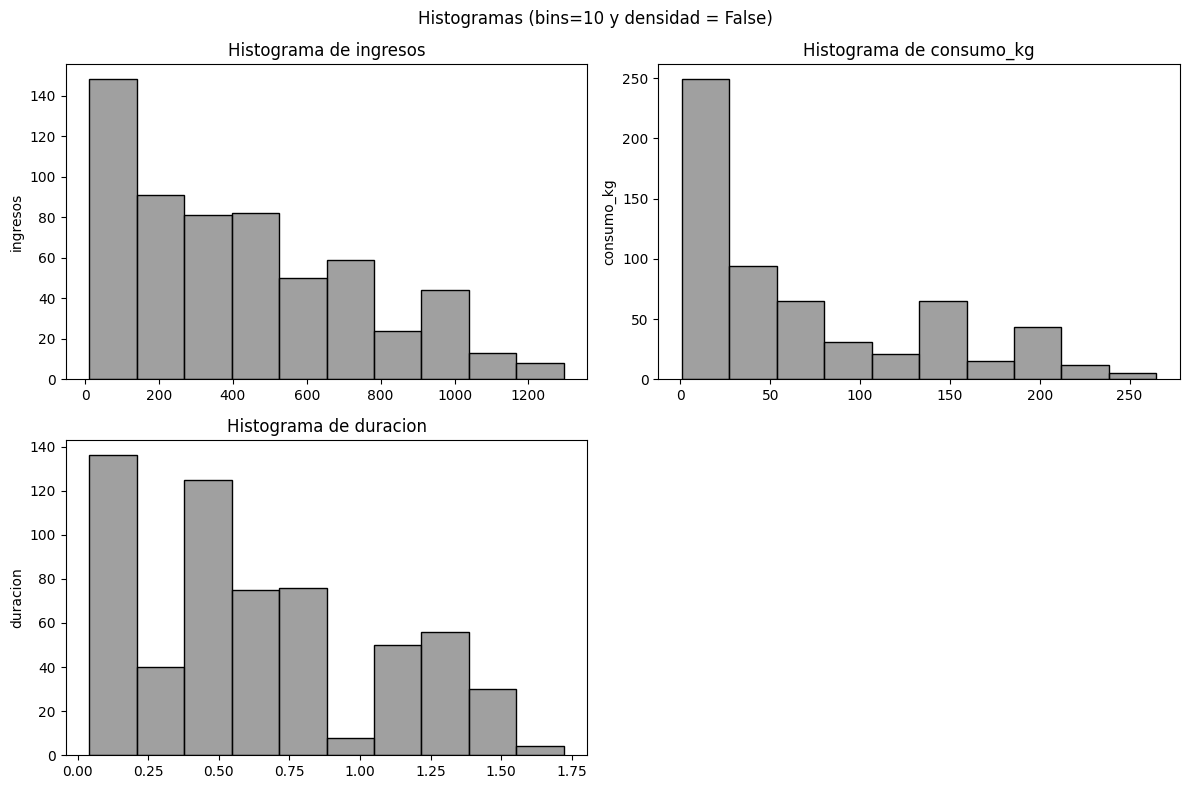

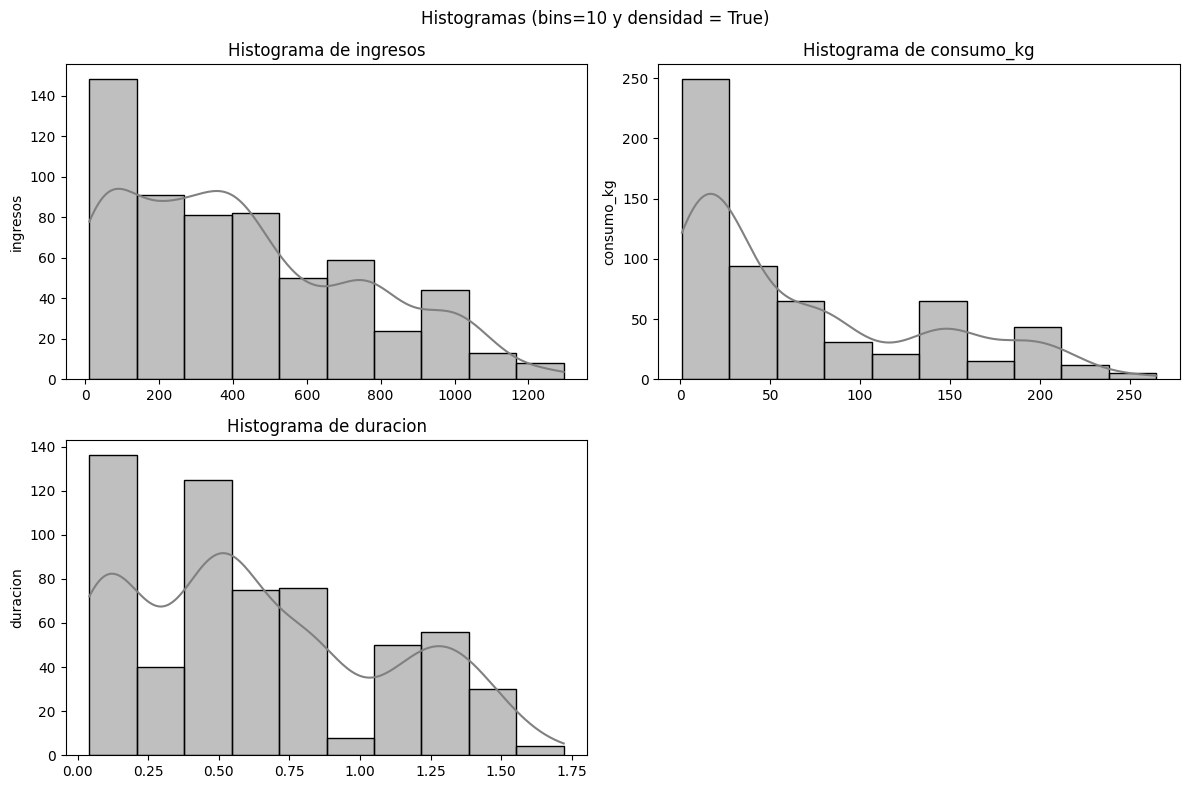

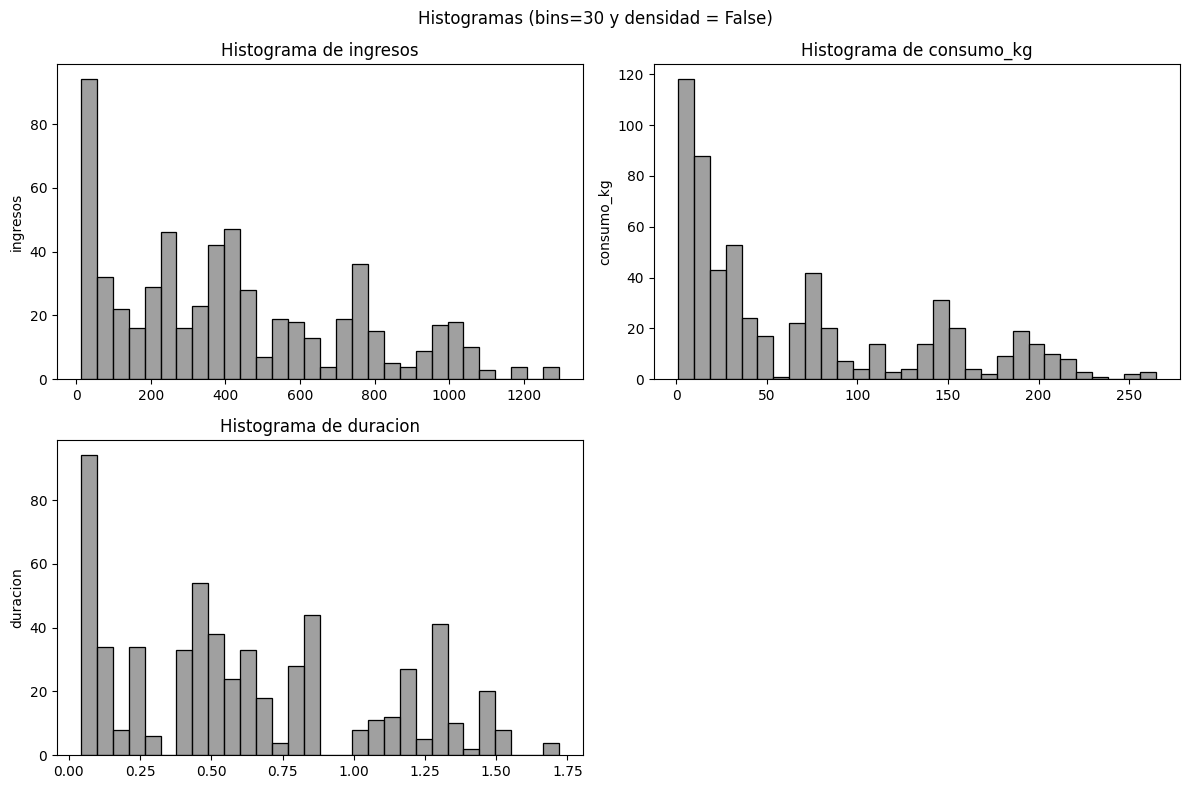

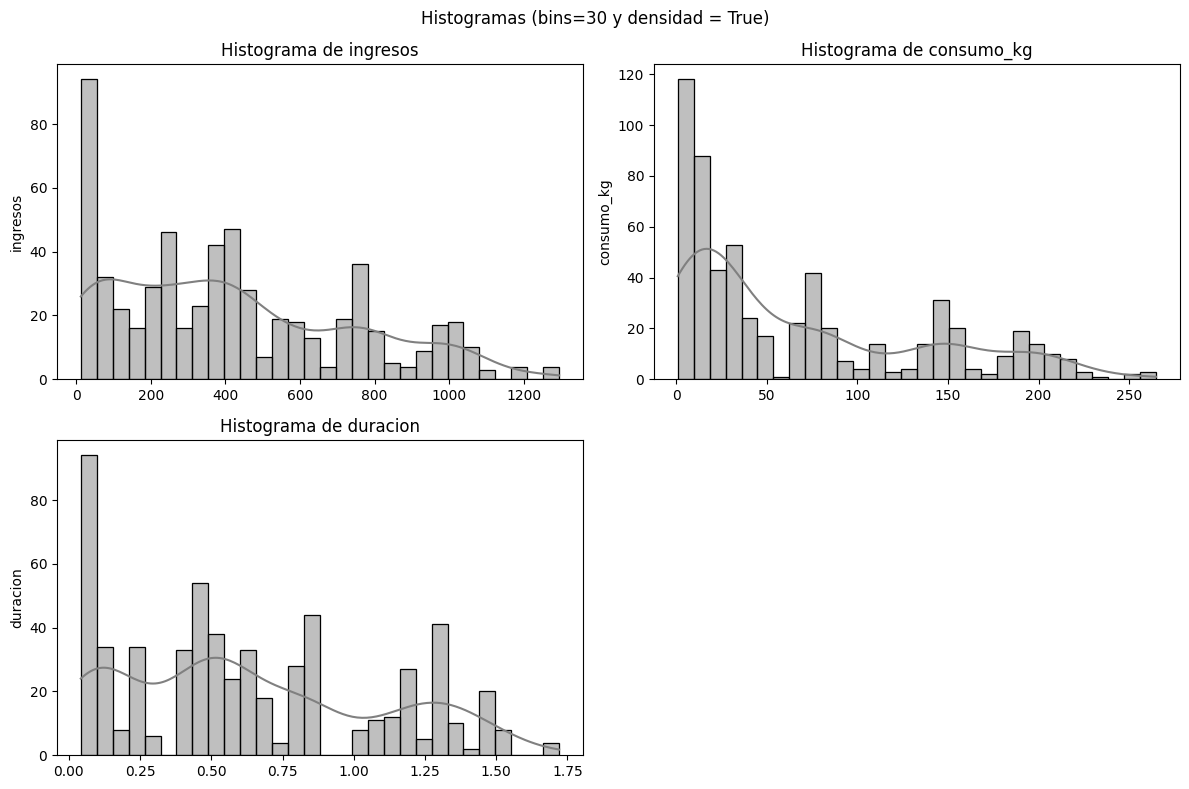

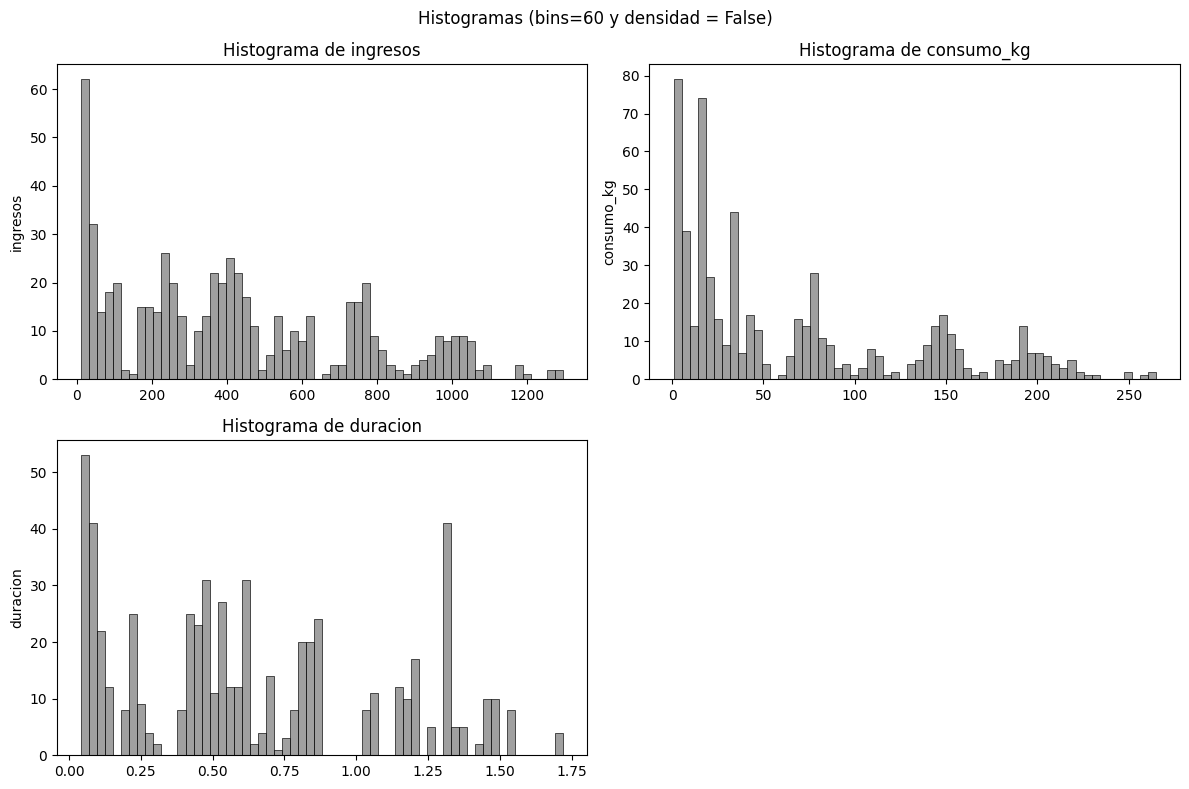

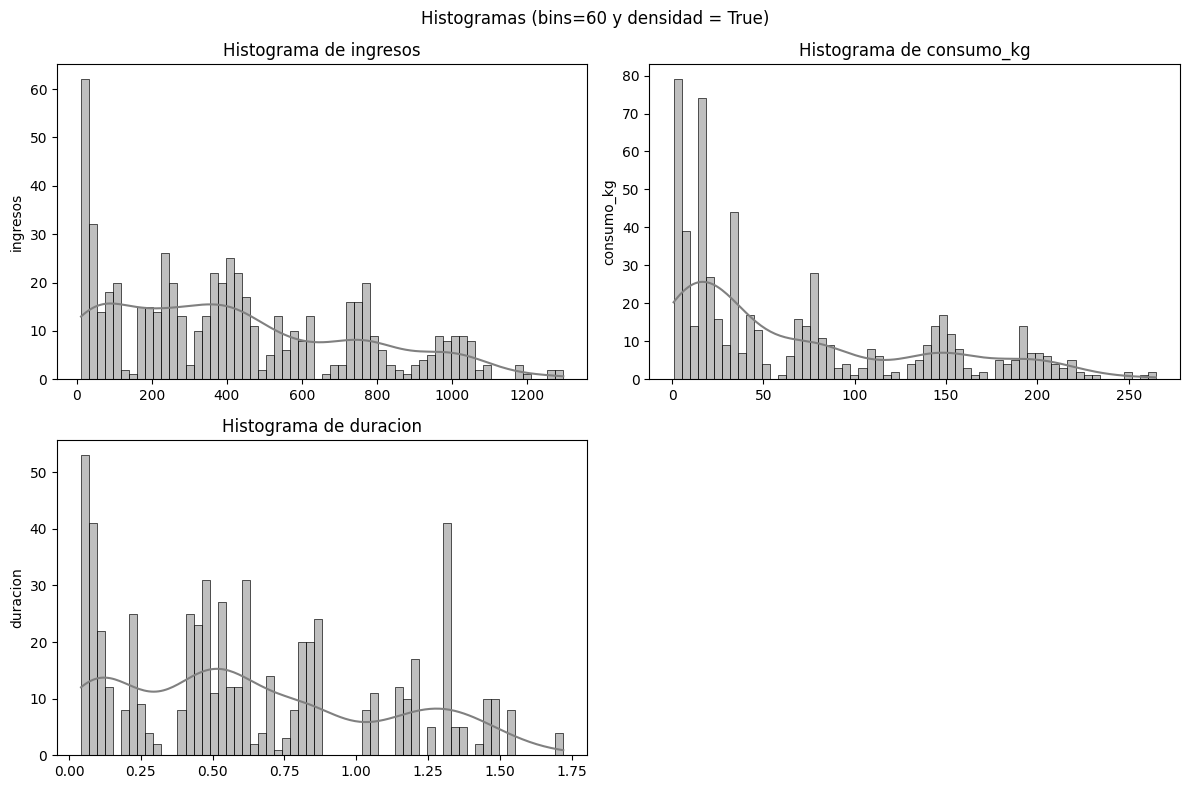

In [16]:
lista_bins = [10,30,60]
lista_densidades = [False, True] 

for i in range(len(lista_bins)):
    for j in range(len(lista_densidades)):
        dibujar_histograma(df_viajes, ["ingresos", "consumo_kg", "duracion"], lista_bins[i], lista_densidades[j])

### Ejercicio 6

Construye una función a la que puedas pasar un dataframe y una serie de columnas numéricas (que suponemos son series temporales o secuencias) y que pinte cada columna en una sola gráfica (de nuevo en una matriz de 2 columnas como mucho).

In [17]:
def dibujar_series(df: pd.DataFrame, lista_cols: list):
    """
    Dibuja cada columna numérica pasada en 'lista_cols' como una serie temporal
    o secuencia, en una matriz de subplots con un máximo de 2 columnas.
    """
    # Número total de series a representar
    tam_lis = len(lista_cols)

    # Cálculo del número de filas: 2 gráficas por fila
    numFilas = (tam_lis + 1) // 2

    # Crear figura y matriz de subplots
    fig, axs = plt.subplots(nrows=numFilas, ncols=2, figsize=(14, 4 * numFilas))

    # Asegurar que axs siempre sea una matriz 2D
    axs = axs.reshape(numFilas, 2)

    # Recorrer todas las columnas indicadas
    for i in range(tam_lis):
        fila = i // 2
        col = i % 2

        # Dibujar la serie completa (índices en el eje X)
        axs[fila, col].plot(df[lista_cols[i]])

        # Título para cada gráfica
        axs[fila, col].set_title(f"Serie de {lista_cols[i]}")

        # Etiquetas de ejes
        axs[fila, col].set_xlabel("Índice")
        axs[fila, col].set_ylabel("Valor")

    # Si sobra una casilla (número impar de columnas), se oculta
    if tam_lis % 2 == 1:
        axs[numFilas - 1, 1].axis("off")

    # Ajuste de la disposición visual
    plt.tight_layout()
    plt.show()


### Ejercicio 7

Visualiza las columnas `open`,`close`,`high`,`low` del dataset de Bitcoin. 

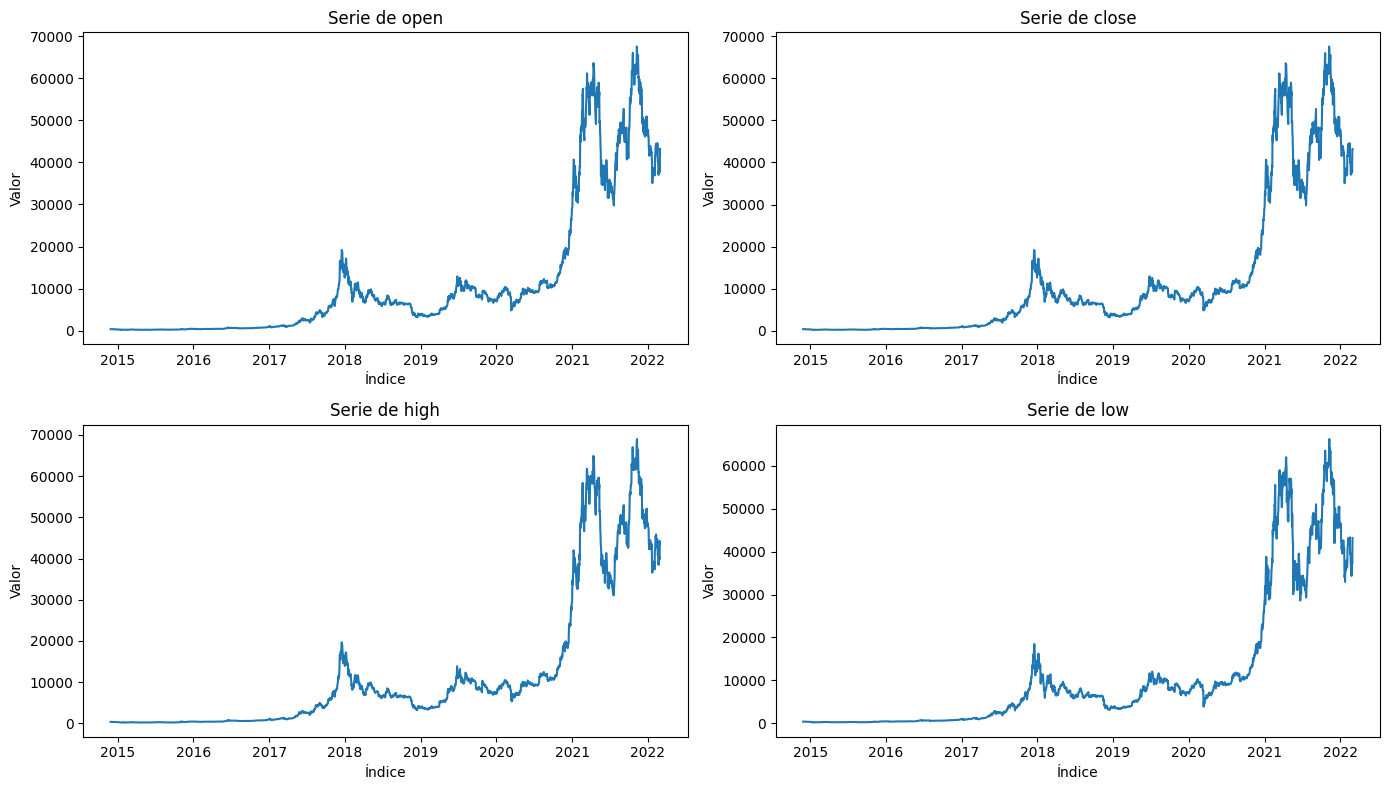

In [18]:
dibujar_series(df_bitcoin, ["open", "close", "high", "low"])

### Ejercicio 8

Añade tres argumentos a la funcion del ejercicio 6. El primero debe permitir pintar una sola gráfica con todas las líneas de evolución juntas y añadir una leyenda. El segundo debe permitir colocar una fecha de inicio y el tercero una fecha de fin. Si no se dan valores a estos argumentos la figura debe contemplarlos todos, si se dan la figura sólo debe mostrar los valores comprendidos entre esas fechas. Supon que la fecha es el índice del DataFrame. De nuevo las gráficas deben estar pintadas con Seaborn.

### Ejercicio 9

Muestra el periodo más interesante y sólo ese de las variables `open`,`close` (de forma conjunta) del dataset de Bitcoin. Usa la función creada en el ejercicio anterior.